# Correlation between CREs and RNA expression

## loading functions and importing packages

In [4]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import sklearn.manifold as sklm
import os
from sklearn.decomposition import PCA
import scanpy as sc
import functions
importlib.reload(functions)
functions.set_user('Kaja')

In [5]:
data = functions.call_data_clean()
ATAC = data['ATAC_seq']
RNA = data['RNA_seq']
QC = data['QC_metrics']
ATAC_scores = data['norm_scores']
exons = data['exons']
ATACtest = data['test1']
ATAC_dis = pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\ATAC_dis_annotated.csv", header=0, index_col=0)

## understanding the data sets

In [6]:
#print(ATAC_dis.head())
#print(ATAC_dis['region_type'])
print(ATAC['genes.within.100Kb'])

ImmGenATAC1219.peakID
ImmGenATAC1219.peak_1           NaN
ImmGenATAC1219.peak_2           NaN
ImmGenATAC1219.peak_3           NaN
ImmGenATAC1219.peak_4           NaN
ImmGenATAC1219.peak_5           NaN
                              ...  
ImmGenATAC1219.peak_512591    Erdr1
ImmGenATAC1219.peak_512592    Erdr1
ImmGenATAC1219.peak_512593    Erdr1
ImmGenATAC1219.peak_512594    Erdr1
ImmGenATAC1219.peak_512595    Erdr1
Name: genes.within.100Kb, Length: 512590, dtype: object


In [ ]:
print(exons.head())

In [4]:
ATAC_100kb = ATAC_dis[ATAC_dis['genes.within.100Kb'].notna()]
ATAC_T = data['ATAC_seq_T']
ATAC_top = data['top2500std']

In [7]:
rna_df=RNA.copy()
promoters=ATAC_dis[ATAC_dis['region_type']=='Promoter']
#print(promoters)
print(promoters.index)

Index(['ImmGenATAC1219.peak_21', 'ImmGenATAC1219.peak_22',
       'ImmGenATAC1219.peak_85', 'ImmGenATAC1219.peak_86',
       'ImmGenATAC1219.peak_140', 'ImmGenATAC1219.peak_141',
       'ImmGenATAC1219.peak_145', 'ImmGenATAC1219.peak_146',
       'ImmGenATAC1219.peak_157', 'ImmGenATAC1219.peak_158',
       ...
       'ImmGenATAC1219.peak_512468', 'ImmGenATAC1219.peak_512478',
       'ImmGenATAC1219.peak_512500', 'ImmGenATAC1219.peak_512501',
       'ImmGenATAC1219.peak_512506', 'ImmGenATAC1219.peak_512507',
       'ImmGenATAC1219.peak_512508', 'ImmGenATAC1219.peak_512522',
       'ImmGenATAC1219.peak_512523', 'ImmGenATAC1219.peak_512533'],
      dtype='object', name='ImmGenATAC1219.peakID', length=28047)


In [9]:
rna_df=rna_df.T
print(rna_df.index)
print(rna_df.head())

Index(['0610007P14Rik', '0610009B22Rik', '0610009O20Rik', '0610010F05Rik',
       '0610010K14Rik', '0610012G03Rik', '0610030E20Rik', '0610037L13Rik',
       '1110004E09Rik', '1110004F10Rik',
       ...
       'Zswim4', 'Zswim8', 'Zufsp', 'Zw10', 'Zwint', 'Zyg11b', 'Zyx', 'Zzef1',
       'Zzz3', 'l7Rn6'],
      dtype='object', length=6451)
               LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  \
0610007P14Rik      7.693863      7.948982       7.595628      7.681578   
0610009B22Rik      6.308741      6.318986       6.126080      6.274600   
0610009O20Rik      7.406382      7.312212       7.294084      7.548910   
0610010F05Rik      6.265552      7.436093       6.908770      7.455771   
0610010K14Rik      7.234254      7.663815       7.285670      7.338289   

               proB.CLP.BM  proB.FrA.BM  proB.FrBC.BM  B.FrE.BM    B1b.PC  \
0610007P14Rik     7.575609     7.722433      7.501594  7.116890  7.133776   
0610009B22Rik     6.742621     6.294673      6.112973  5.863

In [11]:
#print(promoters['genes.within.100Kb'])
#print(promoters.head())
promoters=promoters.T
print(promoters.index)
print(promoters.head(10))


Index(['ImmGenATAC1219.peak_21', 'ImmGenATAC1219.peak_22',
       'ImmGenATAC1219.peak_85', 'ImmGenATAC1219.peak_86',
       'ImmGenATAC1219.peak_140', 'ImmGenATAC1219.peak_141',
       'ImmGenATAC1219.peak_145', 'ImmGenATAC1219.peak_146',
       'ImmGenATAC1219.peak_157', 'ImmGenATAC1219.peak_158',
       ...
       'ImmGenATAC1219.peak_512468', 'ImmGenATAC1219.peak_512478',
       'ImmGenATAC1219.peak_512500', 'ImmGenATAC1219.peak_512501',
       'ImmGenATAC1219.peak_512506', 'ImmGenATAC1219.peak_512507',
       'ImmGenATAC1219.peak_512508', 'ImmGenATAC1219.peak_512522',
       'ImmGenATAC1219.peak_512523', 'ImmGenATAC1219.peak_512533'],
      dtype='object', name='ImmGenATAC1219.peakID', length=28047)
                        chrom   Summit mm10.60way.phastCons_scores  \
ImmGenATAC1219.peakID                                                
ImmGenATAC1219.peak_21   chr1  3671437                        0.72   
ImmGenATAC1219.peak_22   chr1  3671783                        0.91   
ImmGen

In [12]:
rows = []

for idx, row in promoters.iterrows():
    gene_list = str(row['genes.within.100Kb']).split(',')  # aufteilen
    for gene in gene_list:
        gene = gene.strip()
        new_row = row.copy()
        new_row['gene'] = gene
        rows.append(new_row)

promoters_genes_df = pd.DataFrame(rows)
promoters_genes_df = promoters_genes_df.drop(columns=['genes.within.100Kb'])  # alte Spalte raus


In [98]:
promoters_genes_df=promoters_genes_df

In [99]:
promoters_genes_df=promoters_genes_df.copy()

In [13]:
# Zelltypen als Index setzen (wie bei rna_df)
print(promoters_genes_df['gene'])
promoters_genes_df = promoters_genes_df.set_index('gene')
promoters_genes_df.head()


ImmGenATAC1219.peak_21         Xkr4
ImmGenATAC1219.peak_22         Xkr4
ImmGenATAC1219.peak_85          Rp1
ImmGenATAC1219.peak_85        Sox17
ImmGenATAC1219.peak_86          Rp1
                              ...  
ImmGenATAC1219.peak_512522    Ddx3y
ImmGenATAC1219.peak_512523      Uty
ImmGenATAC1219.peak_512523    Ddx3y
ImmGenATAC1219.peak_512533      Uty
ImmGenATAC1219.peak_512533    Ddx3y
Name: gene, Length: 149458, dtype: object


,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,...,var,sd,variability,min,max,range,skewness,region_type,TSS_bin,gene_context
gene,,,,,,,,,,,,,,,,,,,,,
Xkr4,chr1,3671437,0.72,2.02,1.0,Xkr4,0.271312,1.482083,1.442282,1.748886,...,0.301824,0.549385,0.647858,0.068793,3.228378,3.159585,1.050744,Promoter,0-300,genic
Xkr4,chr1,3671783,0.91,9.67,1.0,NaN,2.180315,0.847423,0.525201,1.175393,...,0.381503,0.617660,0.709743,0.068634,4.592076,4.523442,2.625407,Promoter,0-300,downstream
Rp1,chr1,4497061,0.09,3.88,1.0,NaN,1.680462,1.735359,2.310912,1.175393,...,0.423036,0.650412,0.407268,0.314882,3.190593,2.875711,0.440147,Promoter,0-300,genic
Sox17,chr1,4497061,0.09,3.88,1.0,NaN,1.680462,1.735359,2.310912,1.175393,...,0.423036,0.650412,0.407268,0.314882,3.190593,2.875711,0.440147,Promoter,0-300,genic
Rp1,chr1,4497535,0.25,6.35,1.0,NaN,0.271312,1.735359,0.928022,0.824349,...,0.322921,0.568261,0.547874,0.082892,3.986299,3.903407,1.657317,Promoter,0-300,downstream


In [14]:
promoters_genes_df=promoters_genes_df.drop(['chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS'], axis=1)

In [15]:
print(promoters_genes_df.head())

       LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  proB.CLP.BM  \
gene                                                                          
Xkr4       0.271312      1.482083       1.442282      1.748886     1.461194   
Xkr4       2.180315      0.847423       0.525201      1.175393     1.360805   
Rp1        1.680462      1.735359       2.310912      1.175393     2.176748   
Sox17      1.680462      1.735359       2.310912      1.175393     2.176748   
Rp1        0.271312      1.735359       0.928022      0.824349     1.276300   

       proB.FrA.BM  proB.FrBC.BM  preB.FrD.BM  B.FrE.BM    B1b.PC  ...  \
gene                                                               ...   
Xkr4      1.136483      0.485032     0.311767  0.733220  0.096719  ...   
Xkr4      1.161835      1.034058     0.311767  0.720389  0.677425  ...   
Rp1       0.919550      1.087972     1.471074  1.314173  1.558968  ...   
Sox17     0.919550      1.087972     1.471074  1.314173  1.558968  ...   
Rp

In [16]:
print(rna_df.head)

<bound method NDFrame.head of                LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  \
0610007P14Rik      7.693863      7.948982       7.595628      7.681578   
0610009B22Rik      6.308741      6.318986       6.126080      6.274600   
0610009O20Rik      7.406382      7.312212       7.294084      7.548910   
0610010F05Rik      6.265552      7.436093       6.908770      7.455771   
0610010K14Rik      7.234254      7.663815       7.285670      7.338289   
...                     ...           ...            ...           ...   
Zyg11b             7.068884      7.234769       7.434340      7.433421   
Zyx               10.074516      9.967413      10.494566     10.473537   
Zzef1              7.520544      7.295411       7.433883      6.920986   
Zzz3               8.088805      8.438751       8.233536      8.224480   
l7Rn6              6.676449      7.195291       6.823470      7.143841   

               proB.CLP.BM  proB.FrA.BM  proB.FrBC.BM  B.FrE.BM    B1b.PC  \
0610

In [17]:
gemeinsame_Gene = list((promoters_genes_df.index).intersection(rna_df.index))

print(f"Anzahl gemeinsamer Gene: {len(gemeinsame_Gene)}")
print("Gemeinsame Gene (Beispiel):", list(gemeinsame_Gene)[:10])

gemeinsame_zelltypen = list((promoters_genes_df.columns).intersection(rna_df.columns))

print(f"Anzahl gemeinsamer Zelltypen: {len(gemeinsame_zelltypen)}")
print("Gemeinsame Zelltypen (Beispiel):", list(gemeinsame_zelltypen)[:10])

Anzahl gemeinsamer Gene: 6431
Gemeinsame Gene (Beispiel): ['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', 'Pcmtd1', 'Rrs1', 'Vcpip1', 'Sgk3', 'Cops5']
Anzahl gemeinsamer Zelltypen: 85
Gemeinsame Zelltypen (Beispiel): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp']


In [18]:
promoters_genes=promoters_genes_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]
rna_df=rna_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]

print(promoters_genes.shape)
print(rna_df.shape)

#r, p_value=pearsonr(promoters_genes, rna_df)

(53038, 85)
(6431, 85)


In [131]:
print(promoters_genes.head())
#print(rna_df.head())

        LTHSC.34-.BM  LTHSC.34+.BM  STHSC.150-.BM  MPP4.135+.BM  proB.CLP.BM  \
gene                                                                           
Mrpl15      2.587638      3.429832       2.455242      3.096960     3.437418   
Mrpl15      2.587638      1.984891       2.455242      2.200109     2.554667   
Mrpl15      3.193778      4.437257       2.310912      3.326853     3.144278   
Mrpl15      3.991613      4.437257       3.225477      3.725669     4.025335   
Mrpl15      3.825924      4.004058       3.559852      3.574375     3.425042   

        proB.FrA.BM  proB.FrBC.BM  B.FrE.BM    B1b.PC   B.T1.Sp  ...  \
gene                                                             ...   
Mrpl15     3.516028      2.899581  3.403531  3.882044  3.504559  ...   
Mrpl15     2.912287      2.295267  2.964396  2.789433  2.894550  ...   
Mrpl15     2.970835      2.806170  3.405536  3.905597  3.342593  ...   
Mrpl15     4.006140      2.359696  3.751336  4.110177  3.502075  ...   
Mrpl15 

## correlation

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Nur Gene verwenden, die in beiden vorkommen
gemeinsame_Gene = promoters_genes_df.index.intersection(rna_df.index)
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Filter
promoters_genes = promoters_genes_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]
rna_df = rna_df.loc[gemeinsame_Gene, gemeinsame_zelltypen]

# Ergebnislisten
korrelationswerte = []
p_values = []
gen_ids = []

# Iteriere über alle Zeilen im promoters_genes (auch doppelte Gen-Namen)
for idx, row in promoters_genes.iterrows():
    if idx in rna_df.index:
        x = row.values
        y = rna_df.loc[idx].values
        
        if not (np.isnan(x).any() or np.isnan(y).any()):
            r, p = pearsonr(x, y)
        else:
            r, p = np.nan, np.nan

        korrelationswerte.append(r)
        p_values.append(p)
        gen_ids.append(idx)

# Ergebnis-DataFrame
ergebnis = pd.DataFrame({
    'Gen': gen_ids,
    'Pearson_r': korrelationswerte,
    'p_value': p_values
})

print(ergebnis)


          Gen  Pearson_r   p_value
0      Mrpl15  -0.110638  0.313441
1      Mrpl15   0.001612  0.988319
2      Mrpl15   0.036041  0.743315
3      Mrpl15   0.148201  0.175864
4      Mrpl15  -0.005726  0.958524
...       ...        ...       ...
53033    Msl3   0.111133  0.311266
53034    Hccs   0.350650  0.001002
53035    Hccs   0.363234  0.000634
53036   Vamp7  -0.028662  0.794564
53037   Vamp7   0.266675  0.013622

[53038 rows x 3 columns]


## weird plots

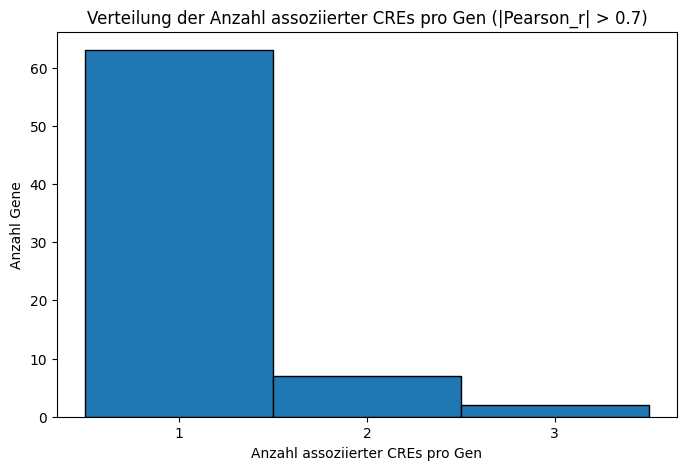

In [38]:
import matplotlib.pyplot as plt

# Schwellenwert für assoziierte CREs (kannst du anpassen)
threshold = 0.7

# Filter: nur CREs mit absoluter Korrelation größer als threshold
assoziierte_cres = ergebnis[ergebnis['Pearson_r'].abs() > threshold]

# Anzahl assoziierter CREs pro Gen zählen
anzahl_cres_pro_gen = assoziierte_cres.groupby('Gen').size()

# Histogramm plotten
plt.figure(figsize=(8,5))
plt.hist(anzahl_cres_pro_gen, bins=range(1, anzahl_cres_pro_gen.max()+2), edgecolor='black', align='left')
plt.xlabel('Anzahl assoziierter CREs pro Gen')
plt.ylabel('Anzahl Gene')
plt.title(f'Verteilung der Anzahl assoziierter CREs pro Gen (|Pearson_r| > {threshold})')
plt.xticks(range(1, anzahl_cres_pro_gen.max()+1))
plt.show()

Anzahl assoziierter Promoter: 83
Anzahl nicht-assoziierter Promoter: 149375


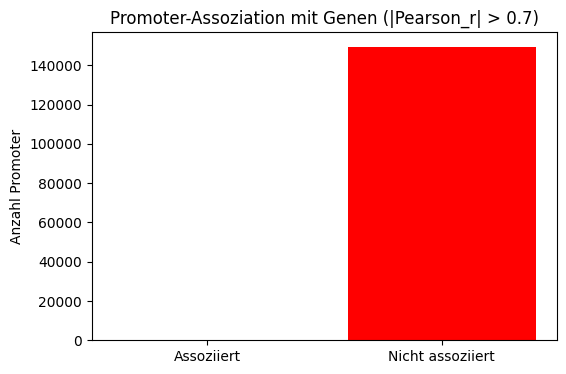

In [39]:
import matplotlib.pyplot as plt

# Schwellenwert für assoziierte Promoter (kannst du anpassen)
threshold = 0.7

# Alle Promoter-IDs (angenommen Index in promoters_genes_df ist eindeutig für Promoter)
alle_promoter = promoters_genes_df.index

# Promoter mit starker Korrelation (assoziierte)
assoziierte_promoter = ergebnis[ergebnis['Pearson_r'].abs() > threshold].index

# Anzahl assoziierte und nicht-assoziierte Promoter
anzahl_assoziierte = len(assoziierte_promoter)
anzahl_nicht_assoziierte = len(alle_promoter) - anzahl_assoziierte

print(f"Anzahl assoziierter Promoter: {anzahl_assoziierte}")
print(f"Anzahl nicht-assoziierter Promoter: {anzahl_nicht_assoziierte}")

# Balkendiagramm zeichnen
plt.figure(figsize=(6,4))
plt.bar(['Assoziiert', 'Nicht assoziiert'], [anzahl_assoziierte, anzahl_nicht_assoziierte], color=['green', 'red'])
plt.ylabel('Anzahl Promoter')
plt.title(f'Promoter-Assoziation mit Genen (|Pearson_r| > {threshold})')
plt.show()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Angenommen, du hast zusätzlich eine Spalte 'Promoter' mit Promoter-IDs in ergebnis
# Falls nicht, musst du die Promoter-IDs beim Berechnen der Korrelation mit abspeichern!

# Beispiel: Promoter mit mehreren Genassoziationen (abs Korrelation > 0.7)
assoziations_threshold = 0.7

# Filter für starke Assoziationen
assoziiert = ergebnis[ergebnis['Pearson_r'].abs() > assoziations_threshold]

# Anzahl Gene pro Promoter
gene_pro_promoter = assoziiert.groupby('Promoter')['Gen'].nunique()

# Promoter mit mehreren Genen
promoter_mehrere_gene = gene_pro_promoter[gene_pro_promoter > 1].index

# Filtere DataFrame auf diese Promoter
assoziiert_multi = assoziiert[assoziiert['Promoter'].isin(promoter_mehrere_gene)]

# Pivot-Tabelle für Heatmap: Zeilen=Promoter, Spalten=Gene, Werte=Pearson_r
heatmap_data = assoziiert_multi.pivot(index='Promoter', columns='Gen', values='Pearson_r')

# Heatmap zeichnen
plt.figure(figsize=(12, max(6, len(heatmap_data)*0.5)))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Pearson r'})
plt.title('Promoter mit mehreren Genassoziationen (Pearson r > 0.7)')
plt.xlabel('Gene')
plt.ylabel('Promoter')
plt.tight_layout()
plt.show()

KeyError: 'Promoter'

Text(0.5, 1.0, 'Verteilung der Peak-Gene-Korrelationen')

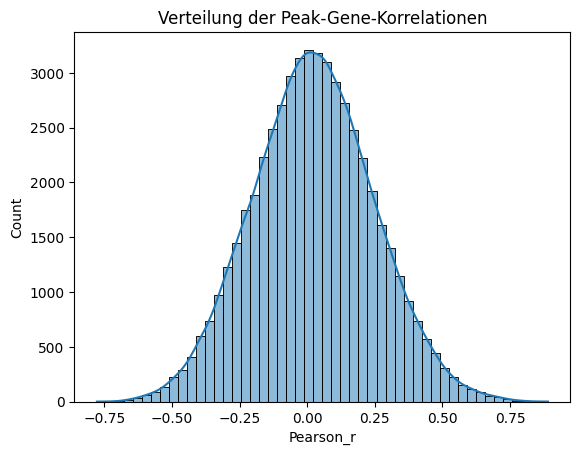

In [20]:
sns.histplot(ergebnis["Pearson_r"], bins=50, kde=True)
plt.title("Verteilung der Peak-Gene-Korrelationen")

In [ ]:
sns.scatterplot(data=ergebnis, x="distance_to_TSS", y="Pearson_r", alpha=0.5)
plt.title("Korrelation vs. Distanz zum TSS")

In [24]:
threshold = 0.5
sig_cor = ergebnis[ergebnis["Pearson_r"].abs() > threshold]
print(f"{len(sig_cor)} von {len(ergebnis)} Peaks sind signifikant korreliert")

1343 von 53038 Peaks sind signifikant korreliert


In [35]:
# 1. Pro Gen den Index der Zeile mit dem höchsten Betrag der Korrelation finden
idx_top_corr = ergebnis.groupby("Gen")["Pearson_r"].apply(lambda x: x.abs().idxmax())

# 2. Diese Zeilen aus ergebnis extrahieren
top_per_gene = ergebnis.loc[idx_top_corr].reset_index(drop=True)

# 3. Optional: sortieren nach Pearson_r (absolut oder direkt)
top_per_gene = top_per_gene.sort_values("Pearson_r", ascending=False)

print(top_per_gene.head())

          Gen  Pearson_r       p_value
4489   Rnf216   0.889868  5.031434e-30
5903  Unc93b1   0.875790  5.518476e-28
2740    Lime1   0.869547  3.703474e-27
4898  Slc25a4   0.845034  2.793879e-24
5199     Stk3   0.822546  4.772915e-22


## not working

In [37]:
import matplotlib.pyplot as plt

gemeinsame_zelltypen = promoters_genes.columns.intersection(rna_df.columns)

for _, row in top_per_gene.iterrows():
    peak_idx = row['peak_index']
    gen = row['Gen']

    # Promoter-Signal für diesen Peak (über Zelltypen)
    x = promoters_genes.loc[peak_idx, gemeinsame_zelltypen].values
    # Gen-Expression
    y = rna_df.loc[gen, gemeinsame_zelltypen].values

    plt.figure(figsize=(6,4))
    plt.scatter(x, y)
    plt.xlabel("ATAC-seq Signal (Peak)")
    plt.ylabel("RNA Expression (Gen)")
    plt.title(f"Gen: {gen} - Top korrelierter Peak")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

KeyError: 'peak_index'

In [36]:
#Indizes der Peaks mit höchster Korrelation pro Gen (entsprechen Zeilen in promoters_genes_df)
top_peak_indices = top_per_gene.index

# Filter auf gemeinsame Zelltypen
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Signalmatrix der Top-Peaks (Peaks × Zelltypen)
top_peak_signals = promoters_genes_df.loc[top_peak_indices, gemeinsame_zelltypen]

KeyError: "None of [Index([4489, 5903, 2740, 4898, 5199, 2363, 2405, 3407, 3280, 2216,\n       ...\n       1400, 4076, 2468,  207, 2581, 5706, 4756, 4433, 1651, 1082],\n      dtype='object', name='gene', length=6431)] are in the [index]"

## weird plots

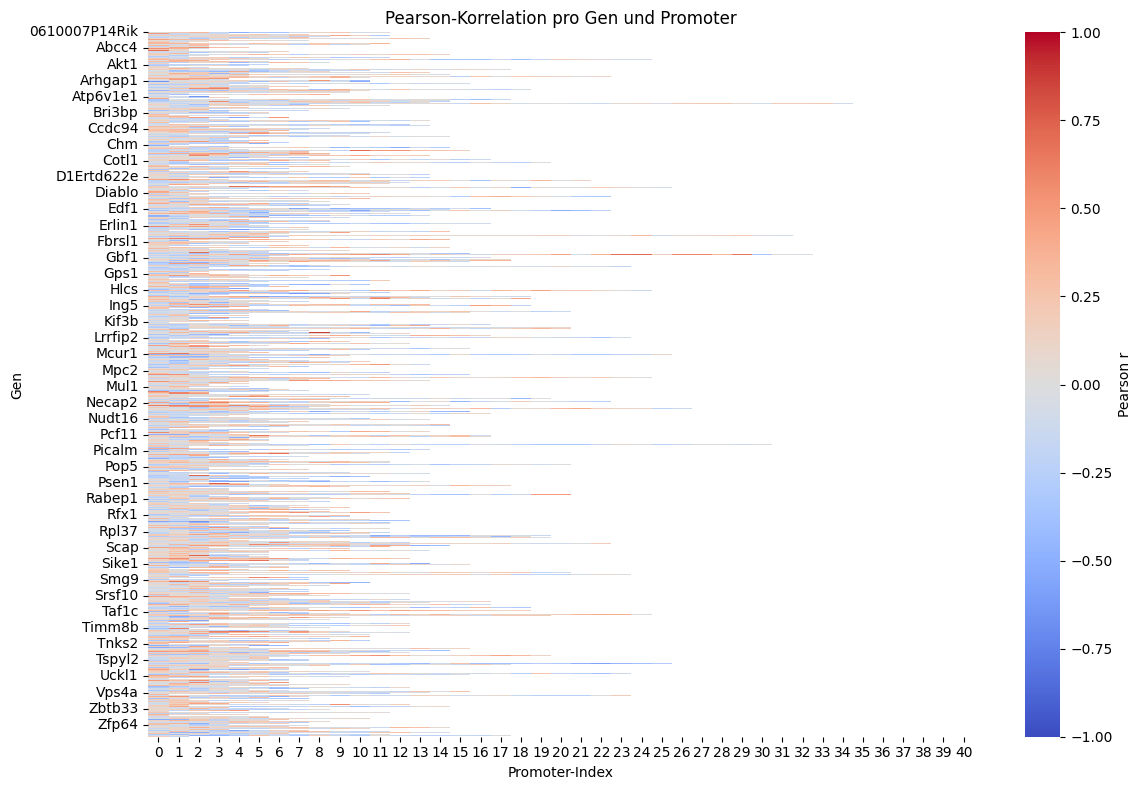

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot-Tabelle: Zeilen = Gene, Spalten = Promoter-Vorkommen (automatisch nummeriert)
heatmap_data = ergebnis.copy()
heatmap_data['Promoter_ID'] = heatmap_data.groupby('Gen').cumcount()

# Pivot in Matrixform (z. B. für Heatmap)
heatmap_matrix = heatmap_data.pivot(index='Gen', columns='Promoter_ID', values='Pearson_r')

# Zeichnen
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False, cbar_kws={'label': 'Pearson r'})
plt.title('Pearson-Korrelation pro Gen und Promoter')
plt.xlabel('Promoter-Index')
plt.ylabel('Gen')
plt.tight_layout()
plt.show()

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Sicherstellen, dass Gene und Zelltypen übereinstimmen
gemeinsame_gene = promoters_genes_df.index.intersection(rna_df.index)
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)

# Filter anwenden
promoters_genes = promoters_genes_df.loc[gemeinsame_gene, gemeinsame_zelltypen]
rna = rna_df.loc[gemeinsame_gene, gemeinsame_zelltypen]

# Korrelation pro Gen (über alle Zelltypen)
correlations = []
for gene in gemeinsame_gene:
    x = promoters_genes.loc[gene].values
    y = rna.loc[gene].values
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, _ = pearsonr(x, y)
    else:
        r = np.nan
    correlations.append(r)

# Heatmap vorbereiten (Gene x Pearson r)
cor_df = pd.DataFrame({'Pearson_r': correlations}, index=gemeinsame_gene)

# Zeichnen
plt.figure(figsize=(1.5, len(cor_df)/80))  # Höhe anpassen bei vielen Genen
sns.heatmap(cor_df, cmap='coolwarm', center=0, linewidths=0.2, cbar_kws={'label': 'Pearson r'})
plt.title("Genweise Pearson-Korrelation\n(Promoter vs RNA über Zelltypen)")
plt.ylabel("Gene")
plt.xlabel("")
plt.tight_layout()
plt.show()

ValueError: `x` and `y` must have the same length along `axis`.

In [ ]:
top_per_gene = cor_df.loc[cor_df.groupby("Gene")["Pearson_r"].apply(lambda x: x.abs().idxmax())]
# pro gen der peak mit der höchsten korrelation

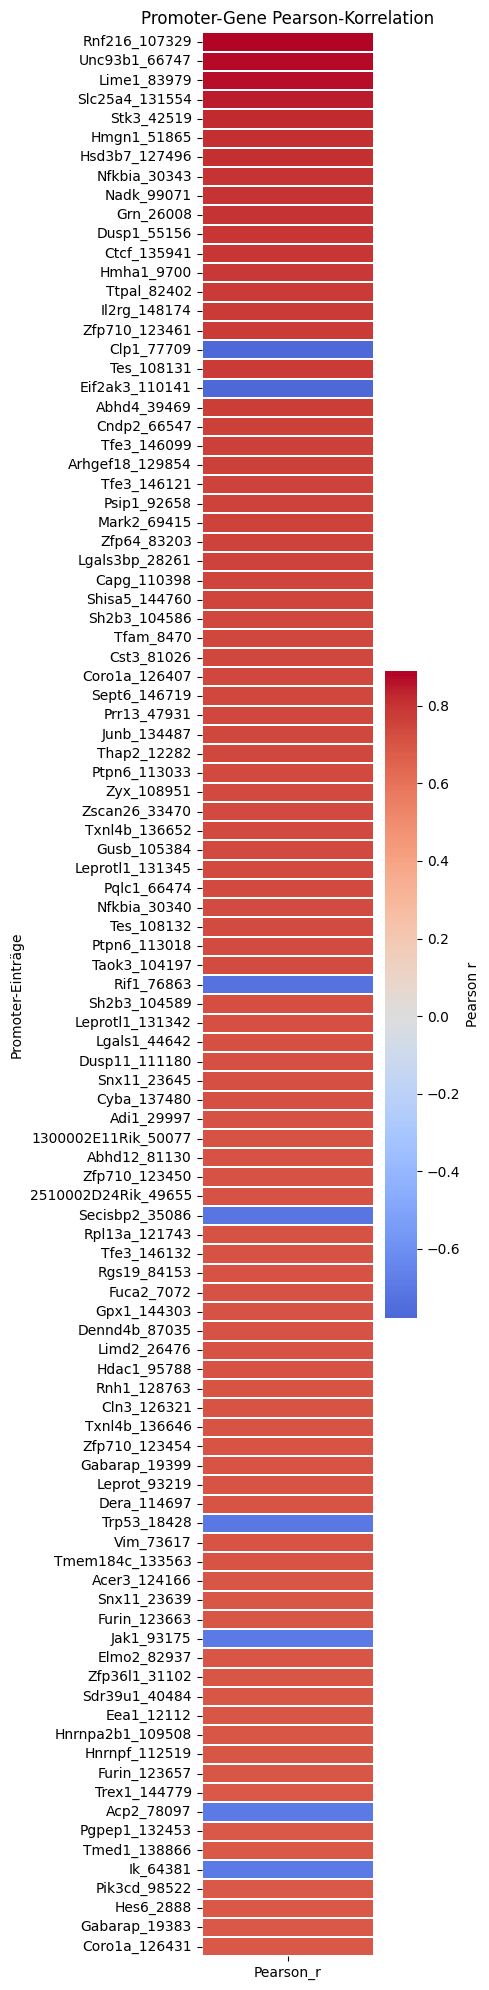

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

korrelationswerte = []
promoter_labels = []

# nur gemeinsame Zelltypen
gemeinsame_zelltypen = promoters_genes_df.columns.intersection(rna_df.columns)
promoters_filtered = promoters_genes_df[gemeinsame_zelltypen]
rna_filtered = rna_df[gemeinsame_zelltypen]

for i, (promoter_index, promoter_row) in enumerate(promoters_filtered.iterrows()):
    gene_name = promoter_index  # falls Index der Gene ist
    if gene_name not in rna_filtered.index:
        korrelationswerte.append(np.nan)
        promoter_labels.append(f"{gene_name}_{i}")
        continue

    x = promoter_row.values
    y = rna_filtered.loc[gene_name].values

    if len(x) != len(y):
        korrelationswerte.append(np.nan)
    elif np.isnan(x).any() or np.isnan(y).any():
        korrelationswerte.append(np.nan)
    else:
        r, _ = pearsonr(x, y)
        korrelationswerte.append(r)

    promoter_labels.append(f"{gene_name}_{i}")

# DataFrame mit den Korrelationen
cor_df = pd.DataFrame({'Pearson_r': korrelationswerte}, index=promoter_labels)

top_n = 100
top_kor_df = cor_df.reindex(cor_df["Pearson_r"].abs().sort_values(ascending=False).index).head(top_n)

# Heatmap zeichnen
plt.figure(figsize=(5, 20))
sns.heatmap(top_kor_df, cmap='coolwarm', center=0, linewidths=0.2, cbar_kws={'label': 'Pearson r'})
plt.title("Promoter-Gene Pearson-Korrelation")
plt.ylabel("Promoter-Einträge")
plt.xlabel("")
plt.tight_layout()
plt.show()

## not working

In [34]:
# nur der am stärksten korrelierte peak pro gen
# 1. Gen-Namen aus dem Index extrahieren und als neue Spalte hinzufügen
cor_df["Gene"] = cor_df.index.str.extract(r"^(.*?)_")  # alles vor dem ersten "_"

# 2. Pro Gen den Index (also den besten Promoter für das Gen) mit höchster |Pearson_r| finden
top_per_gene_idx = cor_df.groupby("Gene")["Pearson_r"].apply(lambda x: x.abs().idxmax())

# 3. Diese Zeilen aus cor_df herausziehen
top_per_gene_df = cor_df.loc[top_per_gene_idx]

# Optional: nach Pearson_r sortieren
top_per_gene_df = top_per_gene_df.sort_values("Pearson_r", ascending=False)

# Ergebnis anzeigen
print(top_per_gene_df.head())

KeyError: 'Column not found: Pearson_r'

In [27]:
from collections import defaultdict
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

cor_matrix = defaultdict(dict)

for i, (promoter_index, promoter_row) in enumerate(promoters_filtered.iterrows()):
    gene_name = promoter_index
    peak_label = f"{gene_name}_{i}"

    if gene_name not in rna_filtered.index:
        continue

    x = promoter_row.values
    y = rna_filtered.loc[gene_name].values

    if len(x) != len(y) or np.isnan(x).any() or np.isnan(y).any():
        continue

    r, _ = pearsonr(x, y)
    cor_matrix[gene_name][peak_label] = r

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Top 50 nach Betrag der Pearson-Korrelation
top_50 = cor_df["Pearson_r"].abs().sort_values(ascending=False).head(50)
top_50_df = cor_df.loc[top_50.index]

# 2. Heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(top_50_df, cmap="coolwarm", center=0, linewidths=0.3, cbar_kws={'label': 'Pearson r'})

plt.title("Top 50 korrelierte Promoter-Gene")
plt.ylabel("Promoter-Peak (Index)")
plt.xlabel("")
plt.tight_layout()
plt.show()


KeyError: 'Pearson_r'

In [28]:
cor_df = pd.DataFrame.from_dict(cor_matrix, orient='index')

In [29]:
top_peaks_per_gene = cor_df.apply(lambda row: row[row.abs().idxmax()], axis=1)
top_peak_labels = cor_df.apply(lambda row: row.abs().idxmax(), axis=1)


In [30]:
heatmap_df = pd.DataFrame({
    'Best_Peak': top_peak_labels,
    'Pearson_r': top_peaks_per_gene
})


In [31]:
# Breite Matrix für Heatmap: One-hot mit r-Werten
heatmap_matrix = pd.DataFrame(index=heatmap_df.index, columns=heatmap_df['Best_Peak'].unique())

for gene, row in heatmap_df.iterrows():
    peak = row['Best_Peak']
    r = row['Pearson_r']
    heatmap_matrix.loc[gene, peak] = r

heatmap_matrix = heatmap_matrix.astype(float)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, len(heatmap_matrix) / 4))
sns.heatmap(heatmap_matrix, cmap="coolwarm", center=0, linewidths=0.1, cbar_kws={'label': 'Pearson r'})
plt.title("Gene vs. höchst korrelierter Peak")
plt.xlabel("Peak")
plt.ylabel("Gen")
plt.tight_layout()
plt.show()

MemoryError: Unable to allocate 1.23 GiB for an array with shape (6431, 6431, 4) and data type float64

<Figure size 1200x160775 with 2 Axes>

In [121]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

korrelationswerte = []
p_values = []

for gene in promoters_genes.index:
    x = promoters_genes.loc[gene].values
    y = rna_df.loc[gene].values
    
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, p = pearsonr(x, y)
    else:
        r, p = np.nan, np.nan
    
    korrelationswerte.append(r)
    p_values.append(p)

ergebnis = pd.DataFrame({
    'Pearson_r': korrelationswerte,
    'p_value': p_values
}, index=promoters_genes.index)

print(ergebnis)

ValueError: `x` and `y` must have the same length along `axis`.

In [120]:
korrelationswerte = []
p_values = []

for gene in gemeinsame_Gene:
    x = promoters_genes.loc[gene].values
    y = rna_df.loc[gene].values
    
    # Prüfen, ob keine NaNs drin sind (ansonsten pearsonr scheitert)
    if not (np.isnan(x).any() or np.isnan(y).any()):
        r, p = pearsonr(x, y)
    else:
        r, p = np.nan, np.nan
    
    korrelationswerte.append(r)
    p_values.append(p)

# Ergebnis als DataFrame
import pandas as pd
ergebnis = pd.DataFrame({'Pearson_r': korrelationswerte, 'p_value': p_values}, index=gemeinsame_Gene)

print(ergebnis)

ValueError: `x` and `y` must have the same length along `axis`.

In [48]:
from scipy.stats import pearsonr
import pandas as pd

results = []

# Hole alle ATAC-Peak-Spalten (außer der Gene-Spalte)
peak_columns = [col for col in promoters.columns if col != 'genes.within.100Kb']

# Iteriere über alle ATAC-Peaks
for peak in peak_columns:
    # Hole ATAC-Werte für alle Zellen
    atac_values = promoters[peak]

    # Hole die Gene, die mit dem Peak assoziiert sind
    gene_list = promoters['genes.within.100Kb'].dropna().apply(lambda x: x.split(','))

    # Wir gehen Zelle für Zelle durch
    for gene_set in gene_list.unique():
        for gene in gene_set:
            gene = gene.strip()
            if gene not in rna_df.columns:
                continue

            # Hole RNA-Werte für dieses Gen
            rna_values = rna_df[gene]

            # Gemeinsame Zellen für beide Werte
            common_cells = atac_values.index.intersection(rna_values.index)

            # Hole ATAC & RNA Werte
            atac_vals = atac_values.loc[common_cells]
            rna_vals = rna_values.loc[common_cells]

            # Prüfe auf gültige Länge
            if len(atac_vals.dropna()) >= 3 and len(rna_vals.dropna()) >= 3:
                r, p = pearsonr(atac_vals, rna_vals)
                results.append({
                    'peak': peak,
                    'gene': gene,
                    'correlation': r,
                    'p_value': p,
                    'n_cells': len(common_cells)
                })

# Ergebnis als DataFrame
cor_df = pd.DataFrame(results)
cor_df = cor_df.sort_values(by='correlation', ascending=False)

# Beispiel-Ausgabe
print(cor_df.head())

KeyError: 'genes.within.100Kb'

In [43]:
from scipy.stats import pearsonr
results=[]
gene=row['genes.within.100Kb']

genes_in_promoters = set(promoters['genes.within.100Kb'])

# Gene aus rna_df (Index)
genes_in_rna = set(rna_df.index)

# Gemeinsame Gene (Schnittmenge)
common_genes = genes_in_promoters.intersection(genes_in_rna)


print(f"Anzahl Gene in beiden Datensätzen: {len(common_genes)}")
print("Beispiele gemeinsamer Gene:", list(common_genes)[:10])


for peak_id, row in promoters.iterrows():
    #peak_id=row['ImmGenATAC1219.peakID']
    gene=row['genes.within.100Kb']
    if peak_id in promoters.index and gene in rna_df.index:
        atac_values = promoters.loc[peak_id]
        rna_values= rna_df.loc[gene]

        r, p=pearsonr(atac_values, rna_values)

        results.append({
            'peak_id': peak_id,
            'gene_name': gene,
            'correlation': r,
            'p_value': p
        })

Anzahl Gene in beiden Datensätzen: 435
Beispiele gemeinsamer Gene: ['Hspa13', 'D1Ertd622e', 'Nipbl', 'Med30', 'Ufm1', 'Pkn2', 'Rgs3', 'Ccnl1', 'Raly', 'Impad1']


ValueError: `x` and `y` must have the same length along `axis`.

In [40]:
corr_df=pd.DataFrame(results)
print(corr_df.head())

Empty DataFrame
Columns: []
Index: []


In [5]:
print("ATAC_scores columns:")
print(list(ATAC_scores.columns))
print("RNA columns:")
print(list(RNA.columns))

gemeinsame_spalten = set(ATAC_scores.columns) & set(RNA.columns)
print("Gemeinsame Spalten:", gemeinsame_spalten)
print("ATAC ohne RNA:", set(ATAC_scores.columns) - set(RNA.columns))
print("RNA ohne ATAC:", set(RNA.columns) - set(ATAC_scores.columns))

ATAC_scores columns:
['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'I

In [41]:
results = []

# 1. Extrahiere alle Gene aus promoters (kann mehrere pro Peak sein, z.B. 'GeneA;GeneB')
genes_in_promoters_raw = promoters['genes.within.100Kb'].dropna().tolist()

genes_in_promoters = set()
for gstr in genes_in_promoters_raw:
    genes_in_promoters.update(gstr.split(';'))

genes_in_rna = set(rna_df.index)
common_genes = genes_in_promoters.intersection(genes_in_rna)

print(f"Anzahl Gene in beiden Datensätzen: {len(common_genes)}")
print("Beispiele gemeinsamer Gene:", list(common_genes)[:10])

# 2. Für jeden Promoter-Peak Korrelation berechnen
for peak_id, row in promoters.iterrows():
    gene_str = row['genes.within.100Kb']
    if pd.isna(gene_str):
        continue
    
    genes_list = gene_str.split(';')
    
    # Suche erstes Gen aus der Schnittmenge common_genes
    gene = None
    for g in genes_list:
        if g in common_genes:
            gene = g
            break
    if gene is None:
        continue
    
    # Promoter ATAC-Signalwerte (alles außer Annotationen)
    # Angenommen, deine Annotationsspalten sind z.B. 'genes.within.100Kb' und andere,
    # und die restlichen Spalten sind Proben mit Signalwerten.
    # Deshalb hier alle Spalten außer Annotationen filtern:
    atac_signal = row.drop(labels=['genes.within.100Kb', 'andere_annot_spalten...'], errors='ignore')
    
    rna_values = rna_df.loc[gene]
    
    if atac_signal.isnull().any() or rna_values.isnull().any():
        continue
    
    r, p = pearsonr(atac_signal, rna_values)
    
    results.append({
        'peak_id': peak_id,
        'gene_name': gene,
        'correlation': r,
        'p_value': p
    })

corr_df = pd.DataFrame(results)
print(f"Korrelationen berechnet für {len(corr_df)} Promoter-Gene Paare")

Anzahl Gene in beiden Datensätzen: 435
Beispiele gemeinsamer Gene: ['Hspa13', 'D1Ertd622e', 'Nipbl', 'Med30', 'Ufm1', 'Pkn2', 'Rgs3', 'Ccnl1', 'Raly', 'Impad1']


NameError: name 'pearsonr' is not defined

In [6]:
def correlate_promoter_atac_rna(ATAC, RNA, ATAC_scores):
    # Nur gemeinsame Cell-Typ-Namen verwenden!
    gemeinsame_celltypen = [col for col in ATAC_scores.columns if col in RNA.columns]
    print(f"Gemeinsame Celltypen ({len(gemeinsame_celltypen)}):", gemeinsame_celltypen)
    
    promoter_peaks = ATAC[ATAC['distance_to_TSS'] <= 2000].copy()
    promoter_peaks['main_gene'] = promoter_peaks['nearest_gene']
    results = []
    for idx, row in promoter_peaks.iterrows():
        gene = row['main_gene']
        if gene in RNA.index:
            atac_vec = row[gemeinsame_celltypen].values.astype(float)
            rna_vec = RNA.loc[gene, gemeinsame_celltypen].values.astype(float)
            if not (np.isnan(atac_vec).any() or np.isnan(rna_vec).any()):
                r, p = scipy.stats.pearsonr(atac_vec, rna_vec)
                results.append({'peak_id': idx, 'gene': gene, 'r': r, 'p': p})
    print(f"Anzahl berechnete Korrelationen: {len(results)}")
    return pd.DataFrame(results)

In [8]:
print(ATAC['distance_to_TSS'])

KeyError: 'distance_to_TSS'

In [7]:
cor_df = correlate_promoter_atac_rna(ATAC_dis[ATAC_dis.index.isin(ATAC_top)], RNA, ATAC_scores)
print(cor_df.columns)
print(cor_df['peak_id'])

Gemeinsame Celltypen (85): ['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th', 'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp', 'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp', 'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI', 'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI

In [10]:
gene_df=exons.copy()
gene_df['TSS'] = np.where(gene_df['Strand'] == '+', gene_df['Transcription Start'], gene_df['Transcription End'])

In [3]:
import pandas as pd

# Beispiel: du hast exons.csv und atac.csv eingelesen
# exons = pd.read_csv("exons.csv")
# ATAC = pd.read_csv("atac.csv")

results = []

for i, peak in ATAC.iterrows():
    peak_chr = peak['chrom']
    peak_summit = peak['Summit']
    
    # Falls mehrere Gene in einem Feld mit Komma getrennt sind
    genes = str(peak['genes.within.100Kb']).split(',')
    
    for gene in genes:
        gene = gene.strip()
        gene_row = exons[(exons['Genname'] == gene) & (exons['Chromosom'] == peak_chr)]
        
        if gene_row.empty:
            continue
        
        strand = gene_row.iloc[0]['Strand']
        
        # TSS je nach Strang
        if strand == '+':
            tss = gene_row.iloc[0]['Transcription Start']
            distance = peak_summit - tss
        else:
            tss = gene_row.iloc[0]['Transcription End']
            distance = tss - peak_summit
        
        results.append({
            'peak_id': peak['ImmGenATAC1219.peakID'],
            'chrom': peak_chr,
            'gene': gene,
            'strand': strand,
            'summit': peak_summit,
            'tss': tss,
            'distance_to_TSS': distance,
            'abs_distance': abs(distance)
        })

# Umwandeln in DataFrame
dist_df = pd.DataFrame(results)

# Beispiel: nächstgelegene CRE pro Gen
closest_CRE_per_gene = dist_df.sort_values(by='abs_distance').groupby('gene').first().reset_index()

# Anzeigen
print(closest_CRE_per_gene.head())

KeyError: 'ImmGenATAC1219.peakID'

In [8]:
atac_df=ATAC.copy()
results=[]
for i, peak in atac_df.iterrows():
    chrom = peak['chrom']
    summit = peak['Summit']
    genes = str(peak['genes.within.100Kb']).split(',')
    for gene in genes:
        gene = gene.strip()

        match = exons[(exons['Genname'] == gene) & (exons['Chromosom'] == chrom)]
            
        if match.empty:
            continue

        row = match.iloc[0]
        strand = row['Strand']
        tss = row['Transcription Start'] if strand == '+' else row['Transcription End']
        distance = summit - tss if strand == '+' else tss - summit
        results.append({
            'peak_id': peak['peak_id'],
            'gene': gene,
            'chrom': chrom,
            'strand': strand,
            'summit': summit,
            'tss': tss,
            'distance_to_TSS': distance,
            'abs_distance': abs(distance)

        })
distance_df = pd.DataFrame(results)

KeyError: 'peak_id'